<a href="https://colab.research.google.com/github/zntbhctp/KalpHastaliklarinaYakalanmaRiskiTahminProjesi/blob/main/Recurrent_Neural_Networks_for_Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
df = pd.read_excel("natural_gas.xlsx")
df.head()

,Consumption,Temperature
0,551547920.0,6.741935
1,551886440.0,5.857143
2,513182950.0,7.225806
3,281495382.0,12.566667
4,138625166.0,17.225806


In [ ]:
mu = df.iloc[:-12,:].mean()
sigma = df.iloc[:-12,:].std()

df = (df - mu) / sigma
df.head()

,Consumption,Temperature
0,0.743564,-1.237245
1,0.744885,-1.359303
2,0.593894,-1.170495
3,-0.309972,-0.433719
4,-0.867340,0.209014


In [ ]:
def make_data(data, lag = 3):
    X = []
    y = []
    for i in range(len(data) - lag):
        X.append(data[i : i + lag])
        y.append(data[i + lag])

    return np.array(X), np.array(y)


X, y = make_data(df["Consumption"].values, lag = 12)
X = X[..., np.newaxis]
print(X.shape)
print(y.shape)


(118, 12, 1)
(118,)


In [ ]:
X_train = X[:-12]
y_train = y[:-12]
X_test = X[-12:]
y_test = y[-12:]

In [ ]:
inputs = keras.Input(shape = X_train.shape[1:])
x = layers.LSTM(64)(inputs)
x = layers.Dense(128, activation = "relu")(x)
outputs = layers.Dense(1, activation = "linear")(x)

mdl = keras.Model(inputs, outputs)

mdl.compile(optimizer = "adam", loss = "mse", metrics = "mae")
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)
mdl.evaluate(X_test, y_test)

1/1 [==============================] - 1s 533ms/step - loss: 0.0783 - mae: 0.2071


[0.07829999178647995, 0.20706707239151]

1/1 [==============================] - 1s 524ms/step


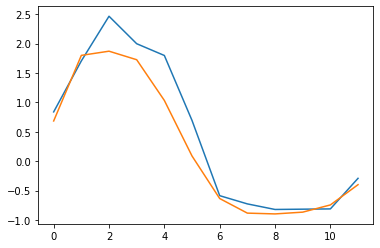

In [ ]:
ypred = mdl.predict(X_test)

plt.plot(y_test)
plt.plot(ypred)

1/1 [==============================] - 1s 1s/step - loss: 0.2048 - mae: 0.3194


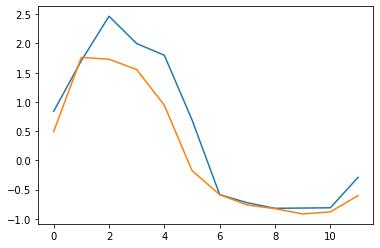

In [ ]:
inputs = keras.Input(shape = X_train.shape[1:])
x = layers.LSTM(64, return_sequences=True)(inputs)
x = layers.LSTM(64)(x)
x = layers.Dense(128, activation = "relu")(x)
outputs = layers.Dense(1, activation = "linear")(x)

mdl = keras.Model(inputs, outputs)

mdl.compile(optimizer = "adam", loss = "mse", metrics = "mae")
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)

ypred = mdl.predict(X_test)
mdl.evaluate(X_test, y_test)
plt.plot(y_test)
plt.plot(ypred)

In [ ]:
inputs = keras.Input(shape = X_train.shape[1:])
x = layers.Bidirectional(layers.LSTM(64))(inputs)
x = layers.Dense(128, activation = "relu")(x)
outputs = layers.Dense(1, activation = "linear")(x)

mdl = keras.Model(inputs, outputs)

mdl.compile(optimizer = "adam", loss = "mse", metrics = "mae")
mdl.fit(X_train, y_train, epochs = 100, verbose = 0)
mdl.evaluate(X_test, y_test)

1/1 [==============================] - 1s 998ms/step - loss: 0.1094 - mae: 0.2558


[0.10943975299596786, 0.25578227639198303]